In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = os.getcwd()
SEED = 42

reset_seeds(SEED)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## pytorch의 신경망의 내부 구조 구현하기

### 1. 기울기

0.1999999999990898


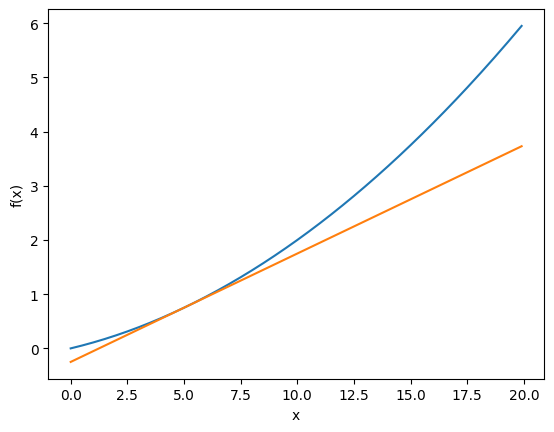

In [6]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    """return (f(x+h) - f(x-h)) / (2*h)"""
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


$
f(x_0,x_1)=x_0^2+x_1^2
$

In [7]:
def function_1(x):
    return x[0]**2+x[1]**2

$x_0 = 3, \; x_1 = 4$  
$\frac{\partial}{\partial x_0}$


In [8]:
def function_tmp1(x0):
    return x0*x0+4.0**2.0

numerical_diff(function_tmp1,3.0)

6.00000000000378

$x_0 = 3, \; x_1 = 4$  
$\frac{\partial}{\partial x_1}$


In [9]:
def function_tmp2(x1):
    return 3.0**2.0+x1*x1

numerical_diff(function_tmp2,4.0),numerical_diff(function_tmp2,np.array([3.0,4.0]))

(7.999999999999119, array([6., 8.]))

## 편미분 동시계산 코드

In [10]:
def numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성

    print("x와 형상이 같은 배열을 생성:", grad,"\n")

    for idx in range(x.size):
        print(f"{idx} 번째 값: {x[idx]}\n")
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        print(f"x after adding h at index {idx}:", x,"\n")
        fxh1 = f(x)
        print(f"f(x+h) at index {idx}:", fxh1,"\n")

        # f(x-h) 계산
        x[idx] = tmp_val - h
        print(f"x after subtracting h at index {idx}:", x,"\n")
        fxh2 = f(x)
        print(f"f(x-h) at index {idx}:", fxh2,"\n")

        print("grad행렬의 상태:", grad,"\n")

        grad[idx] = (fxh1 - fxh2) / (2 * h)

        print(f"grad {idx}:\n", grad[idx])
        x[idx] = tmp_val  # 값 복원
        print(f"{"=="*5} {idx} {"=="*5}:\n")
    return grad


# 예시 실행
numerical_gradient_no_batch(function_1, np.array([3.0, 4.0]))


x와 형상이 같은 배열을 생성: [0. 0.] 

0 번째 값: 3.0

x after adding h at index 0: [3.0001 4.    ] 

f(x+h) at index 0: 25.00060001 

x after subtracting h at index 0: [2.9999 4.    ] 

f(x-h) at index 0: 24.99940001 

grad행렬의 상태: [0. 0.] 

grad 0:
 6.00000000000378
========== 0 ==========:

1 번째 값: 4.0

x after adding h at index 1: [3.     4.0001] 

f(x+h) at index 1: 25.00080001 

x after subtracting h at index 1: [3.     3.9999] 

f(x-h) at index 1: 24.99920001 

grad행렬의 상태: [6. 0.] 

grad 1:
 7.999999999999119
========== 1 ==========:



array([6., 8.])

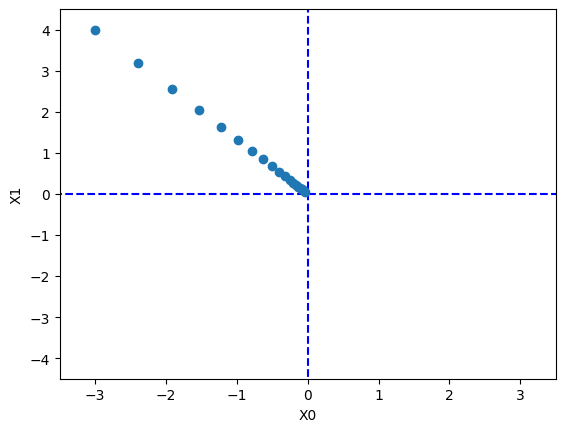

In [11]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from common.gradient import *

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


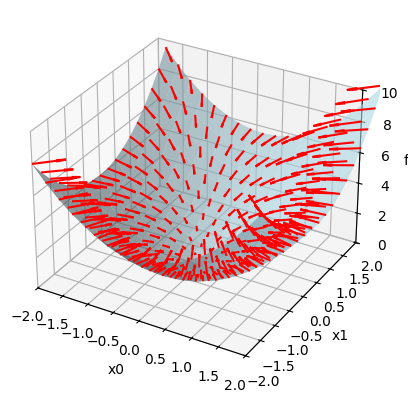

In [12]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 기존에 주어진 수치 미분 함수들 그대로 사용

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

# 2차 함수 정의 (수정됨)
def function_2(x):
    return np.sum(x**2, axis=0)

# 3D 플롯 생성
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    Z = function_2(np.array([X, Y]))  # Z는 X, Y에 대응하는 함수 값
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # 표면 플롯
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='lightblue', alpha=0.6, edgecolor='none')
    
    # 기울기 (Gradient)
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X_flat, Y_flat]) )
    
    ax.quiver(X_flat, Y_flat, function_2(np.array([X_flat, Y_flat])),  # 시작점 (X, Y, Z)
              -grad[0], -grad[1], 0,  # 기울기의 방향
              length=0.1, color='red')
    
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([0, 10])
    
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_zlabel('f(x)')
    
    plt.show()


In [13]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t) # 손실값을 반환함
dW = numerical_gradient(f, net.W)

print(net.W)
print(dW)
print(f)


[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]]
[[ 0.43933772  0.06173286 -0.50107059]
 [ 0.65900658  0.0925993  -0.75160588]]
<function <lambda> at 0x000002AA2E5C32E0>


## 학습 알고리즘 구현
- 1. 모델 구현


```python
# 예시로 가중치 W1의 첫 번째 요소가 전체 손실에 미치는 영향을 구하는 방법
loss_W = lambda W: self.loss(x, t)  # 전체 손실을 반환하는 함수

# W1의 첫 번째 요소에 대해
# f(W1+h) - f(W1-h)를 이용해 해당 요소에 대한 수치 미분을 계산
self.grads['W1'][0, 0] = (loss_W(W1 + h) - loss_W(W1 - h)) / (2 * h)
```

In [2]:
import numpy as np

# 2x2 배열 생성
x = np.array([[1.0, 2.0], [3.0, 4.0]])

# nditer를 사용하여 배열의 각 요소에 대해 읽기/쓰기 수행
it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
    idx = it.multi_index  # 현재 요소의 다차원 인덱스
    print(f"Index {idx}, Value: {x[idx]}")
    
    # 값 수정 (예: 1.0을 더하기)
    x[idx] += 1.0
    print(f"Updated Value at {idx}: {x[idx]}")
    
    it.iternext()  # 다음 요소로 이동

print("Updated array:")
print(x)

Index (0, 0), Value: 1.0
Updated Value at (0, 0): 2.0
Index (0, 1), Value: 2.0
Updated Value at (0, 1): 3.0
Index (1, 0), Value: 3.0
Updated Value at (1, 0): 4.0
Index (1, 1), Value: 4.0
Updated Value at (1, 1): 5.0
Updated array:
[[2. 3.]
 [4. 5.]]


## 핵심
**numerical_gradient 이코드는 지금 각 가중치와 편항이 독립적인 반응계산함
- numerical_gradient함수의 작동원리는 
`loss_W(샘플의 데이터 차원,정답)`이고 여기서 `numerical_gradient`에서 내부적으로 지금 `self.param읠 +-h`만큼 한 두개 연산하고 변화된 두개의 가중치에 대해 loss_W(샘플의 데이터 차원,정답)의 오차  (fxh1 - fxh2) / (2 * h) 하는것임

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        self.grads={}
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t): # t값이 같이 전달 받음
        loss_W = lambda W: self.loss(x, t)
        
        #grads = {}  numerical_gradient(lambda W: self.loss(x, t), self.params['W1']) numerical_gradient predit을 호출함
        self.grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # 미분값 배열을 저장
        self.grads['b1'] = numerical_gradient(loss_W, self.params['b1']) # 미분값 배열을 저장
        self.grads['W2'] = numerical_gradient(loss_W, self.params['W2']) # 미분값 배열을 저장
        self.grads['b2'] = numerical_gradient(loss_W, self.params['b2']) # 미분값 배열을 저장
        
        # x: 특정 가중치 행렬 (self.params['W1'] 또는 self.params['W2']).

        return self.grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        #grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        self.grads['W2'] = np.dot(z1.T, dy)
        self.grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        self.grads['W1'] = np.dot(x.T, dz1)
        self.grads['b1'] = np.sum(dz1, axis=0)

        return self.grads


train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.7868166666666667, 0.7915
train acc, test acc | 0.8776, 0.8794
train acc, test acc | 0.8964, 0.8986
train acc, test acc | 0.9077, 0.9103
train acc, test acc | 0.91385, 0.9166
train acc, test acc | 0.9194333333333333, 0.9205
train acc, test acc | 0.9237833333333333, 0.9247
train acc, test acc | 0.9274, 0.9279
train acc, test acc | 0.9302666666666667, 0.932
train acc, test acc | 0.9333666666666667, 0.9333
train acc, test acc | 0.9358166666666666, 0.9374
train acc, test acc | 0.9376666666666666, 0.938
train acc, test acc | 0.9409166666666666, 0.9422
train acc, test acc | 0.9428666666666666, 0.943
train acc, test acc | 0.9447166666666666, 0.9448
train acc, test acc | 0.9459833333333333, 0.9455


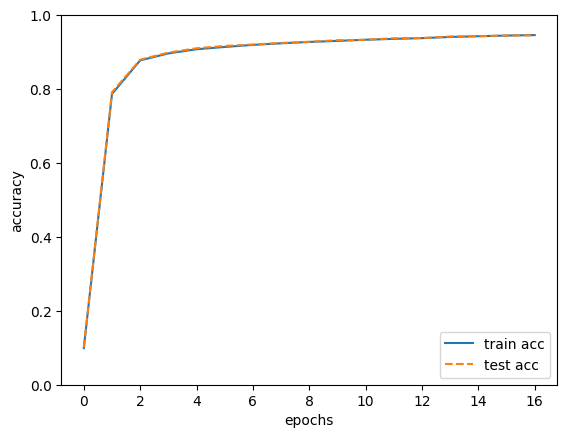

In [19]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [20]:
network.grads

{'W2': array([[-1.76782544e-03,  6.95843858e-04,  7.27958355e-04,
         -8.24864408e-04,  3.84377754e-03,  1.17246667e-03,
         -2.87571983e-03, -1.47491553e-03,  3.94395474e-03,
         -3.44067596e-03],
        [-1.06786132e-03,  3.46029501e-03,  6.29755228e-04,
         -3.58557029e-03,  7.34515259e-04, -1.12354384e-03,
         -1.78147764e-03,  1.13030716e-03,  3.20194252e-03,
         -1.59836209e-03],
        [-1.65424329e-04,  3.51699116e-03, -4.53736448e-03,
          7.80143977e-04,  8.90199659e-04, -2.47277220e-03,
         -6.88712193e-04,  9.47460386e-04,  3.36684031e-03,
         -1.63736229e-03],
        [-6.64401247e-04,  4.04545222e-03, -6.04020870e-03,
          1.64275593e-03,  1.53485603e-03, -1.62349324e-03,
          2.80812143e-03, -1.42427467e-03,  4.08027448e-03,
         -4.35908222e-03],
        [-6.03973725e-03,  3.82213432e-03, -5.05818375e-05,
         -6.53576146e-04,  4.95202067e-03, -1.64689151e-04,
         -2.92571605e-03,  4.11792067e-03,  5.

In [24]:
[print(f"{k}:{v.shape}") for k,v in network.grads.items()]

W2:(50, 10)
b2:(10,)
W1:(784, 50)
b1:(50,)


[None, None, None, None]